In [12]:
import cv2
import numpy as np

In [16]:
img=cv2.imread("t3.jpg")
img_area=img.shape[0]*img.shape[1]
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
threshold=cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 15)
kernel=np.ones((3,2),'uint8')
thresholdn=cv2.erode(threshold,kernel,iterations=4)
cv2.imshow("kbkb",thresholdn)
cv2.waitKey(0)
cv2.destroyAllWindows()
contours,_=cv2.findContours(thresholdn,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
j=0
for cnt in contours:
    if cv2.contourArea(cnt)>img_area/100 and cv2.contourArea(cnt)<0.95*img_area :
        rect = cv2.minAreaRect(cnt)
        box=cv2.boxPoints(rect)
        box=np.int0(box)
        mult = 1
        print(box)
        print(rect)
        W = rect[1][0]
        H = rect[1][1]

        Xs = [i[0] for i in box]
        Ys = [i[1] for i in box]
        x1 = min(Xs)
        x2 = max(Xs)
        y1 = min(Ys)
        y2 = max(Ys)

        rotated = False
        angle = rect[2]

        if angle < -45:
            angle+=90
            rotated = True

        center = (int((x1+x2)/2), int((y1+y2)/2))
        size = (int(mult*(x2-x1)),int(mult*(y2-y1)))

        M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)

        cropped = cv2.getRectSubPix(thresholdn, size, center)    
        cropped = cv2.warpAffine(cropped, M, size)
        croppedW = W if not rotated else H 
        croppedH = H if not rotated else W
        if(np.sum(cv2.bitwise_not(cropped))>j):
            j=np.sum(cv2.bitwise_not(cropped))
            croppedRotated = cv2.getRectSubPix(cropped, (int(croppedW*mult), int(croppedH*mult)), (size[0]/2, size[1]/2))

if((croppedRotated.shape[0]-croppedRotated.shape[1])>10):
    croppedRotated = cv2.rotate(croppedRotated, cv2.cv2.ROTATE_90_CLOCKWISE)
img=croppedRotated
cv2.imshow("kbkb",img)
cv2.waitKey(0)
cv2.destroyAllWindows()
edges = cv2.Canny(img, 100, 100)
edges=cv2.bitwise_not(edges)
minLineLength = (edges.shape[1]*8)//10
a=(edges.shape[0]*2)//10
b=(edges.shape[0]*8)//10
maxLineGap = 70
lines = cv2.HoughLinesP(edges,1,np.pi/180,265,minLineLength,maxLineGap)
if lines is None:
    lines=[]
up=0
down=0
for line in lines:
    for x1,y1,x2,y2 in line:
        if((y1<a)or(y2<a)):
            up+=np.sum(croppedRotated[(y1+y2)//2][min(x1,x2):max(x1,x2)])
        if (y2>b)or(y1>b):
            down+=np.sum(croppedRotated[(y1+y2)//2][min(x1,x2):max(x1,x2)])

if(up>down):
    orn=0
else:
    orn=1
    
for line in lines:
    for x1,y1,x2,y2 in line:
        if(((y1<a)or(y2<a))and(orn==1)):
            cv2.line(croppedRotated,(x1,y1),(x2,y2),(255,255,255),7)
        if (((y2>b)or(y1>b))and(orn==0)):
            cv2.line(croppedRotated,(x1,y1),(x2,y2),(255,255,255),7)
            
if(orn==0):
    croppedRotated = cv2.rotate(croppedRotated, cv2.ROTATE_180)
    
dest_not1 = cv2.bitwise_not(croppedRotated, mask = None)
kernel=np.ones((3,2),'uint8')
dest_not1=cv2.erode(dest_not1,kernel,iterations=2)
img=dest_not1
img_area=img.shape[0]*img.shape[1]
contours,_=cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
image_letter=[]
rect_co=[]
for cnt in contours:
    if cv2.contourArea(cnt)>img_area/100 and cv2.contourArea(cnt)<0.95*img_area :
        x,y,w,h = cv2.boundingRect(cnt)
        rect_co.append([x,y,w,h])

rect_co=sorted(rect_co, key = lambda x: x[0])
final_co=[]
for i in range(len(rect_co)):
    x,y,w,h=rect_co[i]
    if(len(final_co)>0):
        if((final_co[-1][0]<x)and((final_co[-1][0]+final_co[-1][2])>(x+w))):
            pass
        else:
            image_letter.append(img[y:y+h+1,x:x+w+1])
            final_co.append(rect_co[i])
    else:
        image_letter.append(img[y:y+h+1,x:x+w+1])
        final_co.append(rect_co[i])

#padding
def pad(image):
    image=cv2.copyMakeBorder(image,20,  20,  20, 20, cv2.BORDER_CONSTANT, None,0)
    image = cv2.resize(image, (36,36),interpolation = cv2.INTER_NEAREST)
    return image

for i in range(len(image_letter)):
    j=pad(image_letter[i])
    image_letter[i]=j

[[ 63 375]
 [ 48  82]
 [760  46]
 [775 339]]
((411.7680969238281, 210.86502075195312), (712.4873657226562, 293.6827392578125), -2.912733554840088)
[[210 229]
 [208 117]
 [286 115]
 [289 227]]
((248.69012451171875, 172.24586486816406), (78.95960235595703, 112.2343521118164), -1.2453643083572388)


In [3]:
import matplotlib.pyplot as plt

In [10]:
cv2.imshow("khh",image_letter[2])
cv2.waitKey(0)
cv2.destroyAllWindows()

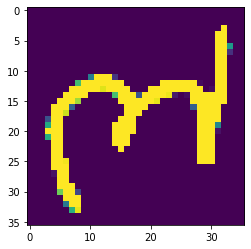

In [8]:
plt.imshow(image_letter[2])